<a href="https://www.kaggle.com/code/chandrashekar28/netflix-eda?scriptVersionId=141193462" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-userbase-dataset/Netflix Userbase.csv


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_csv("/kaggle/input/netflix-userbase-dataset/Netflix Userbase.csv")

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB
None


In [5]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [6]:
df.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [7]:
df.nunique()

User ID              2500
Subscription Type       3
Monthly Revenue         6
Join Date             300
Last Payment Date      26
Country                10
Age                    26
Gender                  2
Device                  4
Plan Duration           1
dtype: int64

In [8]:
df.isnull()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2495,False,False,False,False,False,False,False,False,False,False
2496,False,False,False,False,False,False,False,False,False,False
2497,False,False,False,False,False,False,False,False,False,False
2498,False,False,False,False,False,False,False,False,False,False


In [9]:
df.notnull()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...
2495,True,True,True,True,True,True,True,True,True,True
2496,True,True,True,True,True,True,True,True,True,True
2497,True,True,True,True,True,True,True,True,True,True
2498,True,True,True,True,True,True,True,True,True,True


In [10]:
df.tail()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month
2499,2500,Basic,15,13-08-22,12-07-23,United States,35,Female,Smart TV,1 Month


In [11]:
df.shape

(2500, 10)

In [12]:
df['Subscription Type'].value_counts()

Basic       999
Standard    768
Premium     733
Name: Subscription Type, dtype: int64

In [13]:
df['Gender'].value_counts()

Female    1257
Male      1243
Name: Gender, dtype: int64

In [14]:
df['Country'].value_counts()

United States     451
Spain             451
Canada            317
United Kingdom    183
Australia         183
Germany           183
France            183
Brazil            183
Mexico            183
Italy             183
Name: Country, dtype: int64

In [15]:
df['Age'].value_counts()

39    116
30    116
28    115
31    115
41    114
47    111
37    107
35    105
29    104
40    103
42    102
48    101
46     99
36     99
49     97
43     94
33     93
51     93
32     92
45     89
38     89
34     88
27     87
44     86
50     84
26      1
Name: Age, dtype: int64

In [16]:
df.notnull().value_counts()

User ID  Subscription Type  Monthly Revenue  Join Date  Last Payment Date  Country  Age   Gender  Device  Plan Duration
True     True               True             True       True               True     True  True    True    True             2500
dtype: int64

In [17]:
df.isnull().value_counts()

User ID  Subscription Type  Monthly Revenue  Join Date  Last Payment Date  Country  Age    Gender  Device  Plan Duration
False    False              False            False      False              False    False  False   False   False            2500
dtype: int64

In [18]:
df.groupby('Subscription Type')[['Monthly Revenue','Age']].aggregate(['mean', 'std','min','max'])

Monthly Revenue                          Age                \
                             mean       std min max       mean       std min   
Subscription Type                                                              
Basic                   12.481481  1.681983  10  15  38.828829  7.190629  27   
Premium                 12.590723  1.733319  10  15  38.512960  7.302325  26   
Standard                12.464844  1.647190  10  15  39.022135  7.020237  27   

                       
                  max  
Subscription Type      
Basic              51  
Premium            51  
Standard           51

In [19]:
df.groupby('Device')[['Monthly Revenue','Age']].aggregate(['mean', 'std','min','max'])

Monthly Revenue                          Age                  
                      mean       std min max       mean       std min max
Device                                                                   
Laptop           12.569182  1.675181  10  15  39.036164  7.107074  26  51
Smart TV         12.483607  1.666996  10  15  38.693443  7.335909  27  51
Smartphone       12.384863  1.696780  10  15  38.726248  6.986561  27  51
Tablet           12.592417  1.703888  10  15  38.720379  7.266786  27  51

Text(0.5, 1.0, 'Gender Graph')

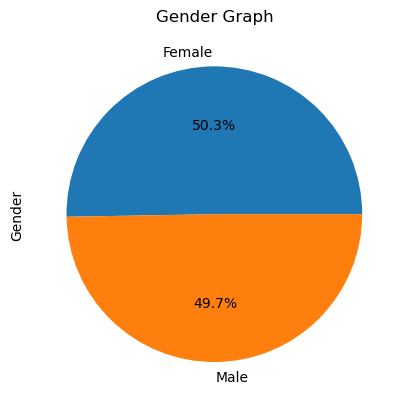

In [20]:
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Graph')

Text(0.5, 0, 'Count')

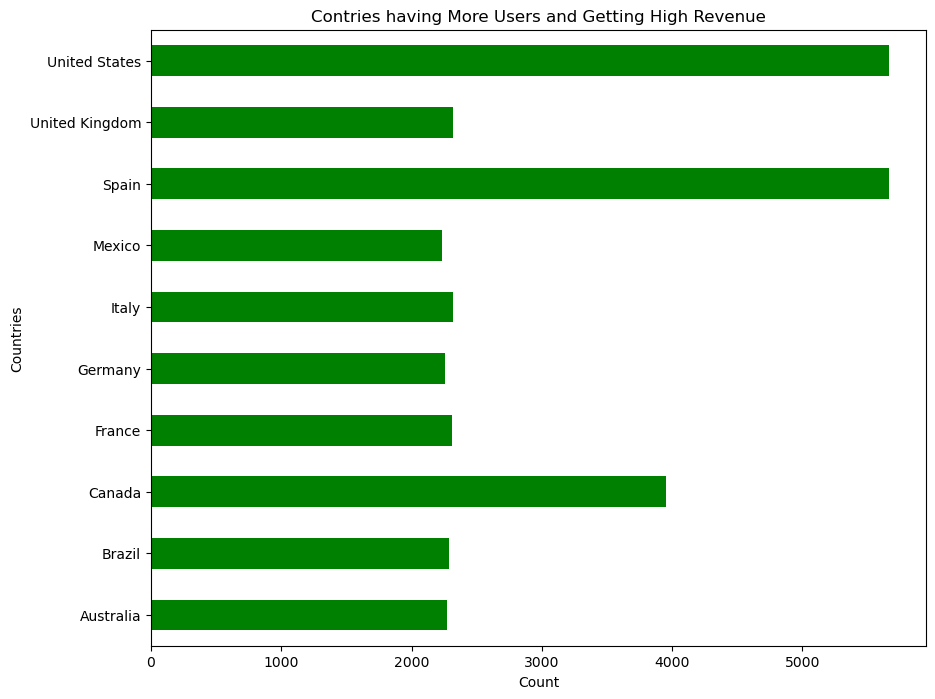

In [21]:
revenue = df.groupby('Country')['Monthly Revenue'].sum()
revenue.plot(kind='barh', color='green', figsize = (10,8))
plt.title('Contries having More Users and Getting High Revenue')
plt.ylabel('Countries')
plt.xlabel('Count')

Text(0.5, 0, '')

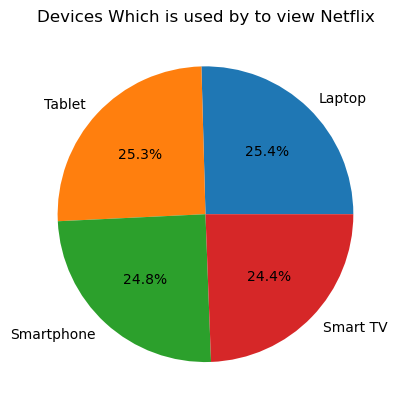

In [22]:
df['Device'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Devices Which is used by to view Netflix')
plt.ylabel('')
plt.xlabel('')

/tmp/ipykernel_20/3269237142.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0, 0.5, 'Count')

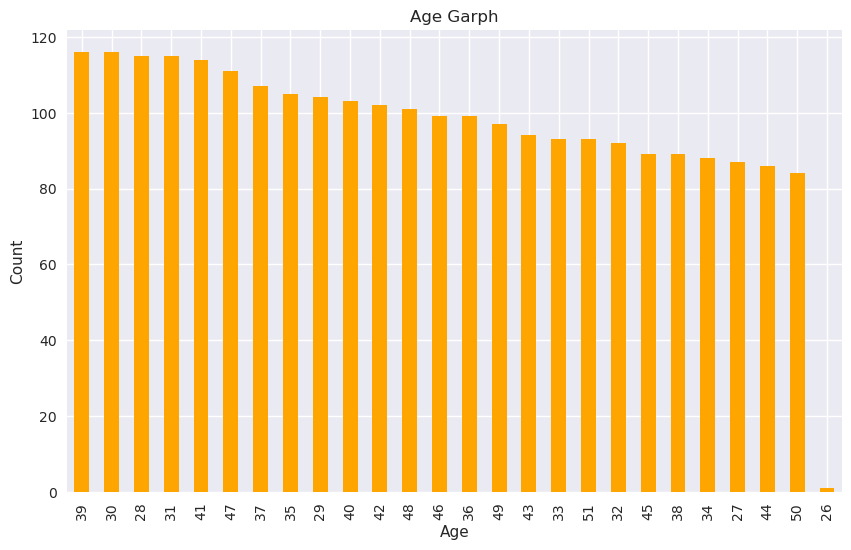

In [23]:
plt.style.use('seaborn')
df['Age'].value_counts().plot(kind='bar', color='orange', figsize=(10,6))
plt.title('Age Garph')
plt.xlabel('Age')
plt.ylabel('Count')

/tmp/ipykernel_20/4100336923.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0, 0.5, 'Subscription Types')

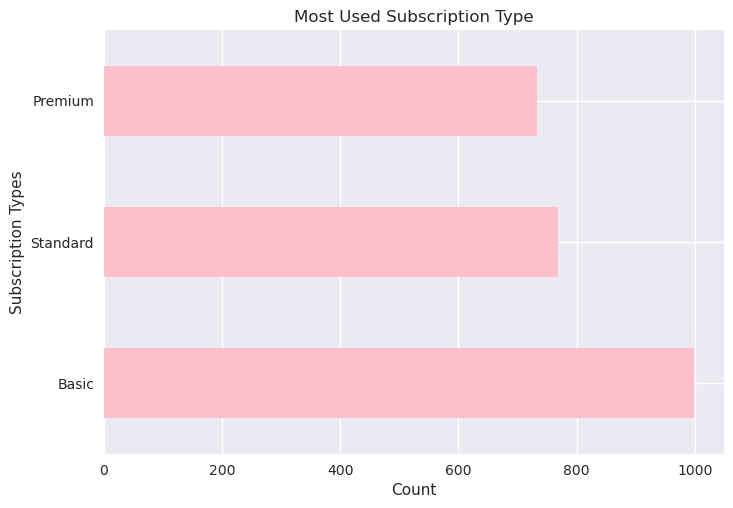

In [24]:
plt.style.use('seaborn')
df['Subscription Type'].value_counts().plot(kind='barh', color='pink')
plt.title('Most Used Subscription Type')
plt.xlabel('Count')
plt.ylabel('Subscription Types')

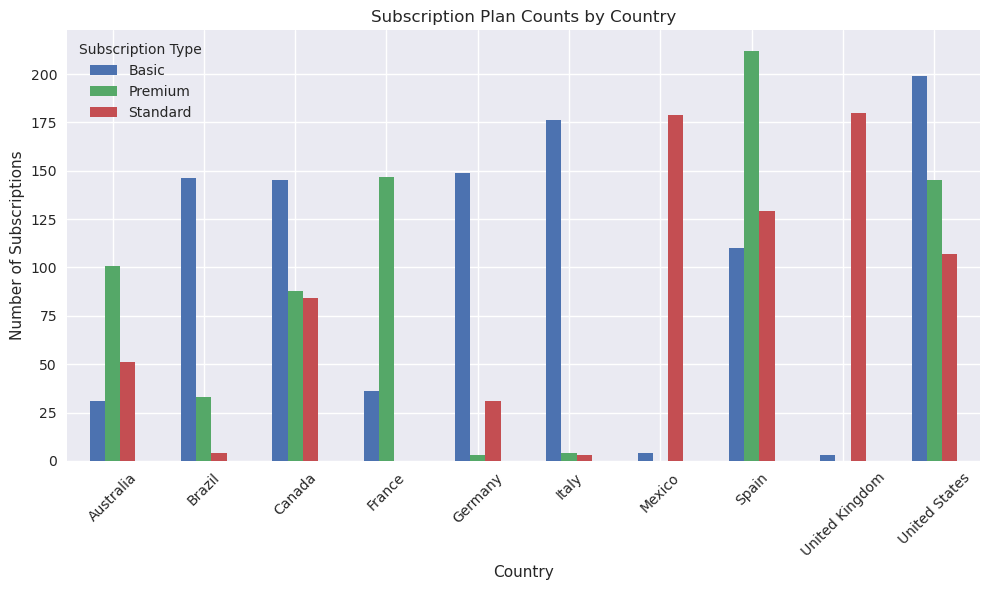

In [25]:
subscription = df.groupby(['Country', 'Subscription Type'])['User ID'].count().unstack()
subscription.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Subscription Plan Counts by Country')
plt.xlabel('Country')
plt.ylabel('Number of Subscriptions')
plt.xticks(rotation=45)
plt.legend(title='Subscription Type')
plt.tight_layout()
plt.show()